<h1 style="text-align: center; border-bottom: 2px solid #ccc; padding-bottom: 10px;">
  Avaliação de Produtos
</h1>

### 1.0 Bibliotecas

In [116]:
#bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pré-processamento
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#modelos
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#nuvem de palavras
from wordcloud import WordCloud

### 2.0 Importando dados

In [2]:
df = pd.read_csv(r"C:\Users\leticia.andradeo\OneDrive - Rede D'Or\Área de Trabalho\AM\avaliacoes_classificadas.csv", sep=",")
df

,Consulta_de_Busca,Titulo_do_Produto,Link,Avaliacao,target
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...,1.0
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...,1.0
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas...",1.0
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...,1.0
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e...",1.0
...,...,...,...,...,...
9810,smartwatch,"HAYLOU RT2 Smartwatch, 1,32"" tela sensível ao ...",https://www.amazon.com.br/dp/B09LV9ZQHX,A mídia não pôde ser carregada.\n ...,1.0
9811,smartwatch,"HAYLOU RT2 Smartwatch, 1,32"" tela sensível ao ...",https://www.amazon.com.br/dp/B09LV9ZQHX,Excelente!,1.0
9812,smartwatch,"HAYLOU RT2 Smartwatch, 1,32"" tela sensível ao ...",https://www.amazon.com.br/dp/B09LV9ZQHX,"Bom produto, fácil de configurar e chegou ante...",1.0
9813,smartwatch,"HAYLOU RT2 Smartwatch, 1,32"" tela sensível ao ...",https://www.amazon.com.br/dp/B09LV9ZQHX,No geral produto muito bom. Único detalhe é qu...,1.0


In [ ]:
#verificar qtd
df.shape

In [ ]:
#qtd de valores únicos
df.nunique()

In [ ]:
#verificar valores vazios
df.isnull().sum()

In [ ]:
# 5 primeiras linhas
df.head()

### 3.0 Exploração dos dados

#### 3.1 Tipo de produto

In [3]:
df['Consulta_de_Busca'].unique()

array(['smartphone', 'smart tv box', 'disco', 'console de videogame',
       'fones de ouvido sem fio', 'impressora', 'ssd ', 'drone',
       'caixa de som portatil', 'aparelho de barbear eletrico', 'social',
       'oculos', 'mouse', 'maquina de cafe expresso', 'liquidificador',
       'fritadeira', 'air fryer', 'aspirador', 'ferro de passar roupa',
       'chapinha de cabelo', 'ventilador', 'ar-condicionado portatil',
       'mochila', 'bolsa', 'tenis', 'calca jeans',
       'sapatos sociais masculinos', 'mocassim', 'camiseta basica',
       'perfume importado', 'teclado', 'camera digital', 'smart tv',
       'tablet', 'maquina', 'vestido', 'purificador de ar', 'joias',
       'cadeira de escritorio', 'tapete', 'smartwatch'], dtype=object)

In [4]:
df['Consulta_de_Busca'].nunique()

41

#### 3.2 Marcas

In [5]:
df['Titulo_do_Produto'].unique()

array(['Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue)',
       'Smartphone Motorola Moto E13 4G 32GB 2GB RAM Verde',
       'Smartphone Xiaomi Redmi Note 12 128GB - 4GB Ram - Versao Global (Onyx Gray)',
       "Samsung Galaxy A04e 64GB 4G Wi-Fi Tela 6.5'' Dual Chip 3GB RAM Câmera Dupla + Selfie 5MP com modo Retrato Bateria de 5000mAh - Preto",
       'Smartphone Motorola Moto G52 128GB 4GB RAM Branco',
       'Smartphone Motorola Moto E22 4G 128GB 4GB RAM Preto',
       "Samsung Galaxy A14 128GB 4G Wi-Fi Tela 6.6'' Dual Chip 4GB RAM Câmera Tripla de até 50MP + Selfie 13MP Bateria de 5000mAh - Preto",
       "Smartphone Samsung Galaxy A54 5G 128GB 8GB RAM Tela 6.4'' Câmera Tripla de até 50MP + Selfie 32MP - Verde Lima",
       'Xiaomi POCO X5 5G Smartphone Dual Sim 256GB Memory 8GB RAM 6.67" AMOLED Display 5000mAh 48MP+13MP CAM (preto)',
       'Smartphone Xiaomi Redmi Note 12S Onyx Black 8GB Ram 256GB',
       'Smartphone Xiaomi POCO X5 Pro 5G Dual SIM 8GB 256GB

In [6]:
df['Titulo_do_Produto'].nunique()

908

#### 3.3 Distribuição da quantidade de palavras nas avaliações

Text(0, 0.5, 'Frequência')

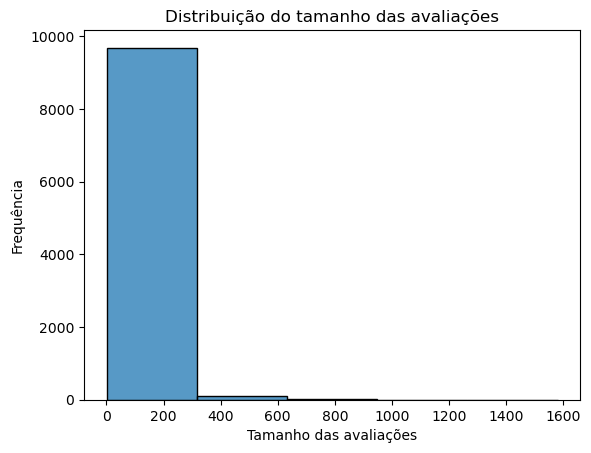

In [18]:
# Tamanho dos textos
df["tamanho_texto"] = df["Avaliacao"].apply(lambda x: len(str(x).split()))
sns.histplot(df["tamanho_texto"], bins=5)
plt.title("Distribuição do tamanho das avaliações")
plt.xlabel("Tamanho das avaliações") # Eixo x
plt.ylabel("Frequência") # Eixo x

count    9815.000000
mean       33.819460
std        74.656828
min         1.000000
25%         7.000000
50%        14.000000
75%        32.000000
max      1580.000000
Name: tamanho_texto, dtype: float64


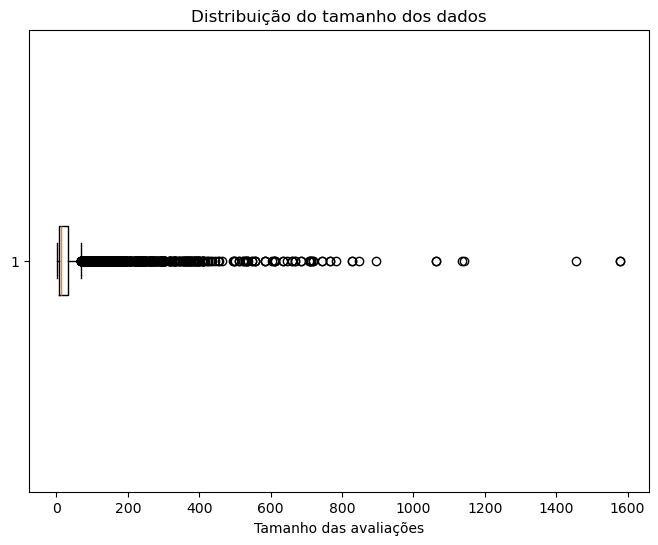

In [14]:
# Criar o boxplot
plt.figure(figsize=(8, 6)) # Ajuste do tamanho da figura
plt.boxplot(df["tamanho_texto"], vert=False)  # Se vert=False, o boxplot será horizontal
plt.xlabel("Tamanho das avaliações") # Eixo x
plt.title("Distribuição do tamanho dos dados")  # Ttítulo do gráfico
print(df[].describe()) # resumo estatístico
plt.show()  # Exibir o gráfico

### 4.0 Classificador por contagem de palavras

#### 4.1 Pré - processamento

In [19]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("portuguese"))

In [20]:
def preprocessamento(texto):
    text = texto.lower() #ransforma todo o texto em letras minúsculas,
    text = re.sub(r"[^\w\s]", "", texto) # Usa expressão regular para eliminar qualquer caractere que não seja uma letra, número ou espaço em branco.
    tokens = nltk.word_tokenize(texto) # Tokeniza o texto, ou seja, divide o texto em palavras (tokens) usando a função word_tokenize do NLTK.
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words] #Remove stopwords #Aplica lematização, ou seja, reduz as palavras à sua forma base (por exemplo, "correram" → "correr").
    return " ".join(tokens)                                                   

In [21]:
df["Avaliacao_Tratada"] = df["Avaliacao"].apply(preprocessamento)

#### 4.2 Palavras positivas

In [22]:
import pandas as pd
import random

# Base de palavras positivas
base_positiva = [
    "ótimo", "excelente", "maravilhoso", "perfeito", "bom", "boa", "funciona", "rápido", "eficiente", 
    "moderno", "bonito", "design", "resistente", "durável", "bateria", "leve", "prático", 
    "compacto", "potente", "intuitivo", "fácil", "responsivo", "incrível", "suave", "estável",
    "seguro", "custo-benefício", "recomendo", "top", "nítido", "vale a pena", "memória boa",
    "ótima câmera", "carregamento rápido", "som perfeito", "imagem clara", "fluido", "qualidade",
    "gostei", "amei", "adorei", "recomendo", "encantou", "atendeu", 
    "funcionou", "surpreendeu", "satisfeito", "agradou", "valeu", "curti", "comprem sem medo","não trava",

    # Adições por categoria de produto
    "tela vibrante", "imagem nítida", "cores vivas",  # TV, tablet, smartphone
    "som potente", "áudio limpo", "graves fortes",    # caixas de som, fones de ouvido
    "boa conectividade", "bluetooth estável", "pareamento fácil",  # fones, smartwatch
    "boa autonomia", "carregamento eficiente",        # drone, smartwatch
    "resposta rápida", "baixa latência",              # mouse, teclado, console
    "corte preciso", "lâmina afiada",                 # barbeador
    "impressão de qualidade", "rendimento bom",       # impressora
    "armazenamento rápido", "transferência veloz",    # SSD
    "esquenta rápido", "faz café delicioso",          # cafeteira
    "muito silencioso", "funcionamento silencioso",   # ventilador, aspirador
    "boa refrigeração", "resfria rápido",             # ar-condicionado
    "costura perfeita", "acabamento impecável",       # roupas, vestido, camisa
    "material de qualidade", "tecido confortável",    # vestuário
    "encaixe perfeito", "confortável no pé",          # tênis, sapato
    "ajuste anatômico", "apoio ergonômico",           # cadeira
    "cheiro agradável", "fixação prolongada",         # perfume
    "joia linda", "brilho intenso",                   # joias
    "tablet rápido", "ideal para leitura",            # tablet
]


# Criar DataFrame 
df_positivas = pd.DataFrame(base_positiva)

#### 4.3 Palavras negativas

In [23]:
import pandas as pd

# Base de palavras negativas
base_negativas = [
    "ruim", "péssimo", "fraco", "horrível", "lento", "problemático", "decepcionante", "trava",
    "não funciona", "quebra", "frágil", "esquenta", "bugado", "descarrega", "erro", 
    "não recomendo", "baixo desempenho", "câmera ruim", "som baixo", "insatisfatório",
    "não gostei", "odiei", "detestei", "não recomendo", "decepcionou", 
    "quebrou", "esquentou", "travou", "falhou", "pifou", "insatisfeito",

    # Adições por categoria
    "imagem borrada", "cores apagadas", "tela escura","lento", "esquenta","frágil", "fraco",      # TV, celular
    "áudio chiado", "sem graves", "microfone ruim",         # fones, caixas de som
    "pareamento difícil", "bluetooth falha",                # fones, smartwatch
    "autonomia ruim", "carrega devagar",                    # smartwatch, drones
    "resposta lenta", "input delay",                        # mouse, controle, teclado
    "corte irregular", "lâmina cega",                       # barbeador
    "papel enrosca", "mancha impressão",                    # impressora
    "memória lenta", "queda de desempenho",                 # SSD
    "faz muito barulho", "ruído alto",                      # aspirador, ventilador
    "não refrigera", "ar fraco",                            # ar-condicionado
    "tecido áspero", "acabamento ruim",                     # roupas
    "desconfortável", "machuca o pé",                       # sapato, tênis
    "cadeira desconfortável", "apoio frágil",               # cadeira escritório
    "cheiro fraco", "duração ruim",                         # perfume
    "joia opaca", "fecho frágil",                           # joias
    "tablet travando", "não roda apps",                     # tablet
]


# Criar DataFrame
df_negativas = pd.DataFrame(base_negativas)

#### 4.4 Aplicação do classificador 

In [25]:
def classificador_de_sentimento(texto, pos_set, neg_set):
    tokens = texto.lower().split()  # coloca tudo em minúsculas
    qtd_positivo = sum(1 for palavra in tokens if palavra in pos_set.values)
    qtd_negativo = sum(1 for palavra in tokens if palavra in neg_set.values)

    if qtd_positivo > qtd_negativo:
        return "positivo"
    elif qtd_negativo > qtd_positivo:
        return "negativo"
    else:
        return "neutro"

In [26]:
# Aplicar classificação
df["Sentimento"] = df["Avaliacao_Tratada"].apply(lambda x: classificador_de_sentimento(x, df_positivas, df_negativas))

In [27]:
df["Sentimento"].unique()

array(['positivo', 'neutro', 'negativo'], dtype=object)

In [28]:
df.head()

,Consulta_de_Busca,Titulo_do_Produto,Link,Avaliacao,target,tamanho_texto,Avaliacao_Tratada,Sentimento
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...,1.0,292,Com necessidade comprar celular custo benefíci...,positivo
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...,1.0,387,Minha experiência 10 dia uso Xiaomi Redmi Note...,positivo
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas...",1.0,103,"Smartphone qualidade esperava , boa configuraç...",positivo
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...,1.0,65,atendeu mto expectativas . Antes usava Samsung...,positivo
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e...",1.0,61,"Gostei celular , resposta rápida todos sentido...",positivo


#### 4.5 Resultado do classificador

In [59]:
# Contagem absoluta por sentimento e produto
resultado_produto_class = pd.DataFrame(df.groupby('Consulta_de_Busca')['Sentimento'].value_counts().unstack(fill_value=0))

# Muda o nome do índice das colunas
resultado_produto_class.rename_axis(columns='Índice', inplace=True)

# Calcula o total por linha (para percentuais)
total_por_linha = resultado_produto_class.sum(axis=1)

# Cria novas colunas com o percentual
resultado_produto_class['negativo_%'] = (resultado_produto_class['negativo'] / total_por_linha * 100).round(2)
resultado_produto_class['neutro_%']   = (resultado_produto_class['neutro'] / total_por_linha * 100).round(2)
resultado_produto_class['positivo_%'] = (resultado_produto_class['positivo'] / total_por_linha * 100).round(2)

# Visualiza
resultado_produto_class.reset_index(inplace=True)
resultado_produto_class

#exportar para excel
resultado_marca_class.to_excel('resultado_produto_class.xlsx', index=True)

Índice,Consulta_de_Busca,negativo,neutro,positivo,negativo_%,neutro_%,positivo_%
0,air fryer,2,53,119,1.15,30.46,68.39
1,aparelho de barbear eletrico,7,55,156,3.21,25.23,71.56
2,ar-condicionado portatil,7,56,49,6.25,50.00,43.75
3,aspirador,1,15,89,0.95,14.29,84.76
4,bolsa,5,94,195,1.70,31.97,66.33
5,cadeira de escritorio,3,34,85,2.46,27.87,69.67
6,caixa de som portatil,1,100,464,0.18,17.70,82.12
7,calca jeans,1,32,57,1.11,35.56,63.33
8,camera digital,3,211,116,0.91,63.94,35.15
9,camiseta basica,2,58,105,1.21,35.15,63.64


In [62]:
# Contagem absoluta por sentimento e produto e marca
resultado_marca_class = pd.DataFrame(df.groupby(['Consulta_de_Busca','Titulo_do_Produto'])['Sentimento'].value_counts().unstack(fill_value=0))

# Muda o nome do índice das colunas
resultado_marca_class.rename_axis(columns='Índice', inplace=True)

# Calcula o total por linha (para percentuais)
total_por_linha_marca_class = resultado_marca_class.sum(axis=1)

# Cria novas colunas com o percentual
resultado_marca_class['negativo_%'] = (resultado_marca_class['negativo'] / total_por_linha_marca_class * 100).round(2)
resultado_marca_class['neutro_%']   = (resultado_marca_class['neutro'] / total_por_linha_marca_class * 100).round(2)
resultado_marca_class['positivo_%'] = (resultado_marca_class['positivo'] / total_por_linha_marca_class * 100).round(2)

# Visualiza
resultado_marca_class.reset_index(inplace=True)
resultado_marca_class

#exportar para excel
resultado_marca_class.to_excel('resultado_marca_class.xlsx', index=True)

Índice,Consulta_de_Busca,Titulo_do_Produto,negativo,neutro,positivo,negativo_%,neutro_%,positivo_%
0,air fryer,FRITADEIRA AIR FRY BRITÂNIA BELLA CUCCINA BCFR...,1,4,4,11.11,44.44,44.44
1,air fryer,FRITADEIRA ELÉTRICA SEM ÓLEO AIR FRYER 4L GAAB...,0,0,3,0.00,0.00,100.00
2,air fryer,"Fritadeira Air Fry BFR21P, Britania, 127v",0,6,4,0.00,60.00,40.00
3,air fryer,"Fritadeira Air Fry Oven BFR2100P, Britania, 127v",0,3,7,0.00,30.00,70.00
4,air fryer,Fritadeira Air Fryer Britnia Oven 12 Litros 18...,0,4,6,0.00,40.00,60.00
...,...,...,...,...,...,...,...,...
916,ventilador,"Ventilador de Mesa, Neo Air 15 Total Control, ...",0,2,8,0.00,20.00,80.00
917,vestido,Mercatoo Vestidos de verão para mulheres com e...,0,0,1,0.00,0.00,100.00
918,vestido,Saida Praia Feminina Vestido Pareo Canga Verão...,0,1,3,0.00,25.00,75.00
919,vestido,Saída de Praia Vira Vestido Canga Plus Size e ...,1,1,7,11.11,11.11,77.78


#### 4.6 Nuvem de palavras

In [ ]:
# Nuvem de palavras
texto_positivo = " ".join(df[df["Sentimento"] == 'positivo']["Avaliacao_Tratada"])
texto_negativo = " ".join(df[df["Sentimento"] == 'negativo']["Avaliacao_Tratada"])

In [ ]:
WordCloud().generate(texto_positivo).to_image()

In [ ]:
WordCloud().generate(texto_negativo).to_image()

### 5.0 Modelo MultinomialNB com a técnica CountVectorizer

#### 5.1 Base de dados com target - classificada

In [64]:
df_com_target = df_com_target = df[df['target'].notna()]

In [65]:
df_com_target.shape

(6674, 8)

In [66]:
df_com_target.head()

,Consulta_de_Busca,Titulo_do_Produto,Link,Avaliacao,target,tamanho_texto,Avaliacao_Tratada,Sentimento
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...,1.0,292,Com necessidade comprar celular custo benefíci...,positivo
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...,1.0,387,Minha experiência 10 dia uso Xiaomi Redmi Note...,positivo
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas...",1.0,103,"Smartphone qualidade esperava , boa configuraç...",positivo
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...,1.0,65,atendeu mto expectativas . Antes usava Samsung...,positivo
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e...",1.0,61,"Gostei celular , resposta rápida todos sentido...",positivo


#### 5.2 Vetorização das palavras com CountVectorizer() e treinamento do modelo MultinomialNB

In [67]:
#Vetorização BoW
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_com_target['Avaliacao_Tratada'])
y = df_com_target['target']

#Split treino e teste 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Treinamento do modelo Naive Bayes
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)

MultinomialNB()

#### 5.3 Avaliação do modelo MultinomialNB

In [68]:
y_pred = modelo_nb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### 5.4 Resultado do modelo MultinomialNB

In [99]:
# Vetorizando
Avaliacao_vet_nb = vectorizer.transform(df['Avaliacao_Tratada'])  # vetorizer = TfidfVectorizer treinado

# Agora você pode prever:
df['Previsao_NB'] = modelo_nb.predict(Avaliacao_vet_nb)

#transformar
df['Previsao_NB'] = df['Previsao_NB'].map({0: 'negativo', 1: 'positivo'})

In [100]:
df.head()

,Consulta_de_Busca,Titulo_do_Produto,Link,Avaliacao,target,tamanho_texto,Avaliacao_Tratada,Sentimento,Previsao_NB
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...,1.0,292,Com necessidade comprar celular custo benefíci...,positivo,positivo
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...,1.0,387,Minha experiência 10 dia uso Xiaomi Redmi Note...,positivo,positivo
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas...",1.0,103,"Smartphone qualidade esperava , boa configuraç...",positivo,positivo
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...,1.0,65,atendeu mto expectativas . Antes usava Samsung...,positivo,positivo
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e...",1.0,61,"Gostei celular , resposta rápida todos sentido...",positivo,positivo


In [107]:
# Contagem absoluta por sentimento e produto
resultado_produto_nb = pd.DataFrame(df.groupby('Consulta_de_Busca')['Previsao_NB'].value_counts().unstack(fill_value=0))

# Muda o nome do índice das colunas
resultado_produto_nb.rename_axis(columns='Índice', inplace=True)

# Calcula o total por linha (para percentuais)
total_por_linha_nb = resultado_produto_nb.sum(axis=1)

# Cria novas colunas com o percentual
resultado_produto_nb['negativo_%'] = (resultado_produto_nb['negativo'] / total_por_linha_nb * 100).round(2)
resultado_produto_nb['positivo_%'] = (resultado_produto_nb['positivo'] / total_por_linha_nb * 100).round(2)

# Visualiza
resultado_produto_nb.reset_index(inplace=True)
resultado_produto_nb

#exportar para excel
#resultado_produto_nb.to_excel('resultado_produto_class.xlsx', index=True)

Índice,Consulta_de_Busca,negativo,positivo,negativo_%,positivo_%
0,air fryer,1,173,0.57,99.43
1,aparelho de barbear eletrico,1,217,0.46,99.54
2,ar-condicionado portatil,1,111,0.89,99.11
3,aspirador,0,105,0.00,100.00
4,bolsa,1,293,0.34,99.66
5,cadeira de escritorio,3,119,2.46,97.54
6,caixa de som portatil,1,564,0.18,99.82
7,calca jeans,1,89,1.11,98.89
8,camera digital,4,326,1.21,98.79
9,camiseta basica,2,163,1.21,98.79


In [ ]:
# Contagem absoluta por sentimento e produto e marca
resultado_marca_nb = pd.DataFrame(df.groupby(['Consulta_de_Busca','Titulo_do_Produto'])['Previsao_NB'].value_counts().unstack(fill_value=0))

# Muda o nome do índice das colunas
resultado_marca_nb.rename_axis(columns='Índice', inplace=True)

# Calcula o total por linha (para percentuais)
total_por_linha_marca_nb = resultado_marca_nb.sum(axis=1)

# Cria novas colunas com o percentual
resultado_marca_nb['negativo_%'] = (resultado_marca_nb['negativo'] / total_por_linha_marca_nb * 100).round(2)
resultado_marca_nb['positivo_%'] = (resultado_marca_nb['positivo'] / total_por_linha_marca_nb * 100).round(2)

# Visualiza
resultado_marca_nb.reset_index(inplace=True)
resultado_marca_nb

#exportar para excel
#resultado_marca_nb.to_excel('resultado_marca_nb.xlsx', index=True)

#### 5.5 Nuvem de palavras

In [110]:
# Nuvem de palavras
texto_positivo = " ".join(df[df["Previsao_NB"] == 'positivo']["Avaliacao_Tratada"])

In [111]:
# Nuvem de palavras
texto_negativo = " ".join(df[df["Previsao_NB"] == 'negativo']["Avaliacao_Tratada"])

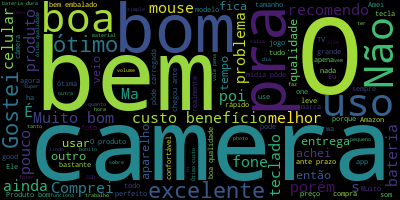

In [113]:
WordCloud().generate(texto_positivo).to_image()

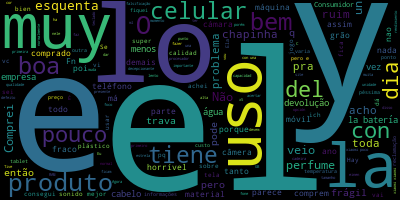

In [114]:
WordCloud().generate(texto_negativo).to_image()

### 6.0 Modelo com LogisticRegression com TfidfVectorizer

#### 6.1 Vetorizaçao com TfidfVectorizere treinamento do modelo LogisticRegression

In [117]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_com_target["Avaliacao_Tratada"])
y = df_com_target["target"]

#Split treino e teste 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Treinando o modelo LogisticRegression()
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)

LogisticRegression()

#### 6.2 Avaliação do modelo LogisticRegression()

In [118]:
y_pred = modelo_lr.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        54
         1.0       0.97      1.00      0.99      1949

    accuracy                           0.97      2003
   macro avg       0.99      0.51      0.51      2003
weighted avg       0.97      0.97      0.96      2003



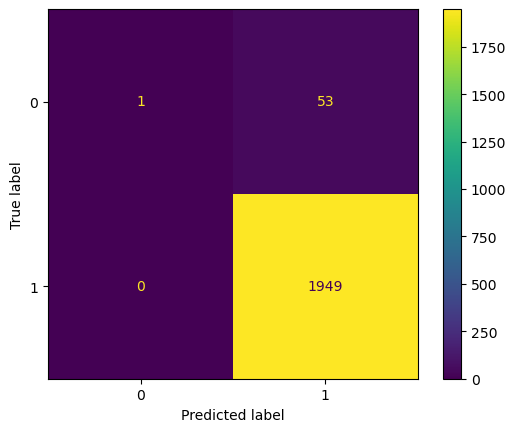

In [119]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### 6.3 Resultado do modelo LogisticRegression()

In [120]:
# Vetorizando
Avaliacao_vet_lr = vectorizer.transform(df['Avaliacao_Tratada'])  # vetorizer = TfidfVectorizer treinado

# Agora você pode prever:
df['Previsao_LR'] = modelo_nb.predict(Avaliacao_vet_lr)

#transformar
df['Previsao_LR'] = df['Previsao_LR'].map({0: 'negativo', 1: 'positivo'})

In [121]:
# Contagem absoluta por sentimento e produto
resultado_produto_lr = pd.DataFrame(df.groupby('Consulta_de_Busca')['Previsao_LR'].value_counts().unstack(fill_value=0))

# Muda o nome do índice das colunas
resultado_produto_lr.rename_axis(columns='Índice', inplace=True)

# Calcula o total por linha (para percentuais)
total_por_linha_lr = resultado_produto_lr.sum(axis=1)

# Cria novas colunas com o percentual
resultado_produto_lr['negativo_%'] = (resultado_produto_lr['negativo'] / total_por_linha_lr * 100).round(2)
resultado_produto_lr['positivo_%'] = (resultado_produto_lr['positivo'] / total_por_linha_lr * 100).round(2)

# Visualiza
resultado_produto_lr.reset_index(inplace=True)
resultado_produto_lr

#exportar para excel
#resultado_produto_lr.to_excel('resultado_produto_lr.xlsx', index=True)

Índice,Consulta_de_Busca,negativo,positivo,negativo_%,positivo_%
0,air fryer,1,173,0.57,99.43
1,aparelho de barbear eletrico,1,217,0.46,99.54
2,ar-condicionado portatil,1,111,0.89,99.11
3,aspirador,0,105,0.00,100.00
4,bolsa,1,293,0.34,99.66
5,cadeira de escritorio,3,119,2.46,97.54
6,caixa de som portatil,1,564,0.18,99.82
7,calca jeans,1,89,1.11,98.89
8,camera digital,4,326,1.21,98.79
9,camiseta basica,2,163,1.21,98.79


In [122]:
# Contagem absoluta por sentimento e produto e marca
resultado_marca_lr = pd.DataFrame(df.groupby(['Consulta_de_Busca','Titulo_do_Produto'])['Previsao_LR'].value_counts().unstack(fill_value=0))

# Muda o nome do índice das colunas
resultado_marca_lr.rename_axis(columns='Índice', inplace=True)

# Calcula o total por linha (para percentuais)
total_por_linha_marca_lr = resultado_marca_lr.sum(axis=1)

# Cria novas colunas com o percentual
resultado_marca_lr['negativo_%'] = (resultado_marca_lr['negativo'] / total_por_linha_marca_lr * 100).round(2)
resultado_marca_lr['positivo_%'] = (resultado_marca_lr['positivo'] / total_por_linha_marca_lr * 100).round(2)

# Visualiza
resultado_marca_lr.reset_index(inplace=True)
resultado_marca_lr

#exportar para excel
#resultado_marca_nb.to_excel('resultado_marca_nb.xlsx', index=True)

Índice,Consulta_de_Busca,Titulo_do_Produto,negativo,positivo,negativo_%,positivo_%
0,air fryer,FRITADEIRA AIR FRY BRITÂNIA BELLA CUCCINA BCFR...,0,9,0.0,100.0
1,air fryer,FRITADEIRA ELÉTRICA SEM ÓLEO AIR FRYER 4L GAAB...,0,3,0.0,100.0
2,air fryer,"Fritadeira Air Fry BFR21P, Britania, 127v",0,10,0.0,100.0
3,air fryer,"Fritadeira Air Fry Oven BFR2100P, Britania, 127v",0,10,0.0,100.0
4,air fryer,Fritadeira Air Fryer Britnia Oven 12 Litros 18...,0,10,0.0,100.0
...,...,...,...,...,...,...
916,ventilador,"Ventilador de Mesa, Neo Air 15 Total Control, ...",0,10,0.0,100.0
917,vestido,Mercatoo Vestidos de verão para mulheres com e...,0,1,0.0,100.0
918,vestido,Saida Praia Feminina Vestido Pareo Canga Verão...,0,4,0.0,100.0
919,vestido,Saída de Praia Vira Vestido Canga Plus Size e ...,0,9,0.0,100.0


#### 6.4 Nuvem de palavras

In [123]:
texto_positivo = " ".join(df[df["Previsao_LR"] == 'positivo']["Avaliacao_Tratada"])

In [124]:
texto_negativo = " ".join(df[df["Previsao_LR"] == 'negativo']["Avaliacao_Tratada"])

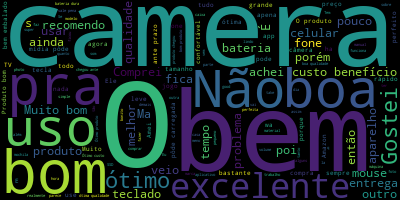

In [125]:
WordCloud().generate(texto_positivo).to_image()

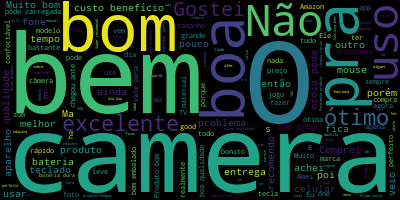

In [126]:
WordCloud().generate(texto_positivo).to_image()

### 7.0 Comparação das abordagens